In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# step 1 : Use pandas to get some insights into the data (10 marks)

In [2]:
df=pd.read_csv("house_rental_data.csv.txt")

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
dataset=df.drop("Unnamed: 0",axis=1)

In [5]:
# the number of observations in the dataset
print("Number of Observations : ",dataset.shape[0])

Number of Observations :  645


In [6]:
# the number of columns in the dataset
print("Number of Observations : ",dataset.shape[1])

Number of Observations :  7


In [7]:
# Print the name of all the columns
dataset.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [8]:
# data types of each column
dataset.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [9]:
# DataFrame Info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [10]:
# Describe all the columns
dataset.describe(include='all')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [11]:
dataset.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

#  Step 2: Show some interesting visualization of the data (10 marks)

<AxesSubplot: xlabel='Sqft', ylabel='Price'>

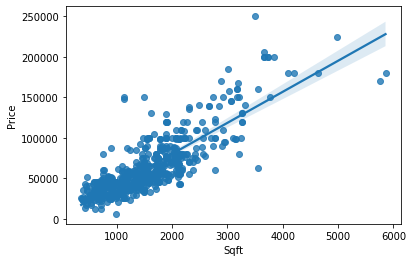

In [12]:
import seaborn as sns
sns.regplot(x=dataset['Sqft'], y=dataset['Price'])

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

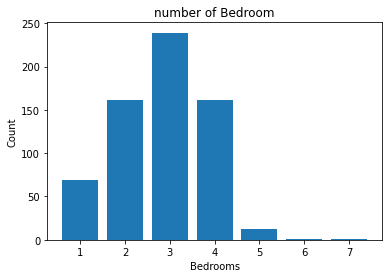

In [13]:
plt.bar(x=dataset['Bedroom'].value_counts().index,
        height=dataset.Bedroom.value_counts().values)
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

(array([ 38., 230., 167., 126.,  46.,  20.,  15.,   2.,   0.,   1.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

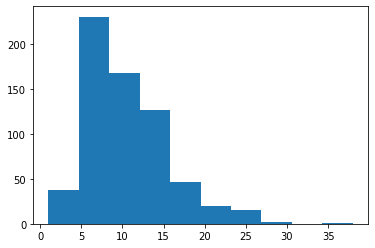

In [14]:
plt.hist(x=dataset['TotalFloor'])

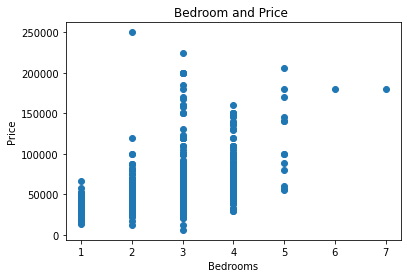

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [15]:
plt.scatter(dataset.Bedroom,dataset.Price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

<AxesSubplot: >

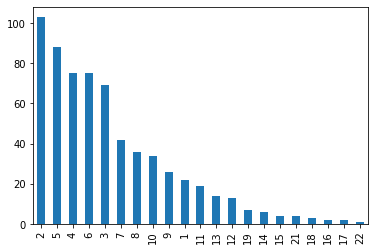

In [16]:
dataset.Floor.value_counts().plot(kind='bar')

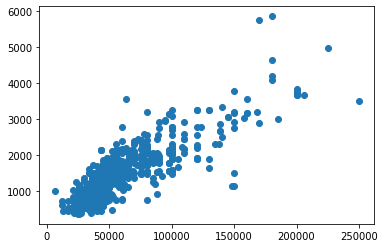

In [17]:
plt.scatter(dataset.Price,dataset.Sqft)

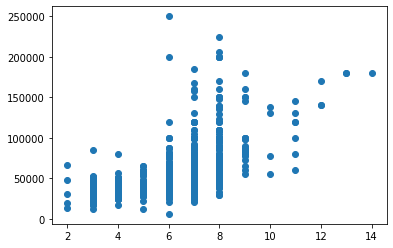

In [18]:
plt.scatter((dataset['Bedroom']+dataset['Living.Room']+dataset['Bathroom']),dataset['Price'])

# Seaborn Visualization for the dataset of House Rental Prediction

<AxesSubplot: >

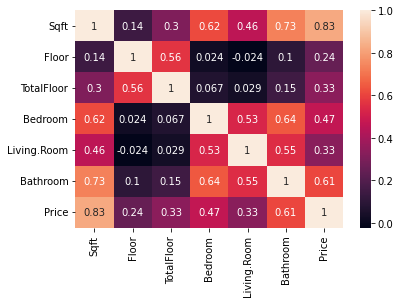

In [19]:
sns.heatmap(dataset.corr(),annot=True)

# Train Test Split

In [20]:
x=dataset.iloc[:,0:6]
y=dataset.iloc[:,6]

In [21]:
x.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [22]:
y.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [25]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train
y_train
x_test
y_test

516
516
129
129


352    100000
530     28000
315     55000
249     43000
266     25000
        ...  
440     17000
239     68000
501    158000
34      46000
427    168000
Name: Price, Length: 129, dtype: int64

# data prerpocessing

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
minmax=MinMaxScaler()
std=StandardScaler()

In [27]:
xt=minmax.fit_transform(x_train)

In [28]:
xt[:3]

array([[0.14627832, 0.04761905, 0.16216216, 0.4       , 0.5       ,
        0.25      ],
       [0.13462783, 0.04761905, 0.16216216, 0.6       , 0.5       ,
        0.25      ],
       [0.3236246 , 0.23809524, 0.16216216, 0.4       , 0.5       ,
        0.25      ]])

In [29]:
xts=minmax.transform(x_test)

In [30]:
xts[:3]

array([[0.40064725, 0.42857143, 0.43243243, 0.6       , 0.5       ,
        0.5       ],
       [0.11585761, 0.04761905, 0.10810811, 0.4       , 0.5       ,
        0.        ],
       [0.24401294, 0.57142857, 0.54054054, 0.2       , 0.5       ,
        0.25      ]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
LR=LinearRegression()

In [33]:
LR.fit(xt,y_train)

LinearRegression()

In [34]:
y_pred=LR.predict(xts)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.7101964960563816

In [37]:
LR.score(xts,y_test)

0.7101964960563816

In [ ]:
#  using standardscaler

In [39]:
xtt=std.fit_transform(x_train)
xts=std.transform(x_test)

In [40]:
LR.fit(xtt,y_train)

LinearRegression()

In [41]:
y_preds=LR.predict(xts)

In [43]:
r2_score(y_test,y_preds)

0.7101964960563816

In [44]:
LR.score(xts,y_test)

0.7101964960563816